In [235]:
#datasets are collected from analyticsvidhya.com
#here a tweet with label '0' is of positive sentiment while a tweet with label '1' is of negative sentiment

In [236]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings 
from nltk import PorterStemmer
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [237]:
df_train = pd.read_csv('train.csv')

In [238]:
df_train = df_train.copy()

In [239]:
df_train.shape

(31962, 3)

In [240]:
df_train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [241]:
df_test = pd.read_csv('test.csv')

In [242]:
df_test = df_test.copy()

In [243]:
df_test.shape

(17197, 2)

In [244]:
df_test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [245]:
#removing twitter handles
def remove_pattern(text,pattern):   
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [246]:
df_train['tweet'] = np.vectorize(remove_pattern)(df_train['tweet'], "@[\w]*") 
df_train.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [247]:
#Removing Punctuations, Numbers, and Special Characters
df_train['tweet'] = df_train['tweet'].str.replace("[^a-zA-Z#]", " ")
df_train.head(10)

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide society now #motivation
5,6,0,huge fan fare and big talking before the...
6,7,0,camping tomorrow danny
7,8,0,the next school year is the year for exams ...
8,9,0,we won love the land #allin #cavs #champ...
9,10,0,welcome here i m it s so #gr


In [248]:
#removing short words
df_train['tweet'] = df_train['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_train.head(10)

,id,label,tweet
0,1,0,when father dysfunctional selfish drags kids i...
1,2,0,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty
3,4,0,#model love take with time
4,5,0,factsguide society #motivation
5,6,0,huge fare talking before they leave chaos disp...
6,7,0,camping tomorrow danny
7,8,0,next school year year exams think about that #...
8,9,0,love land #allin #cavs #champions #cleveland #...
9,10,0,welcome here


In [249]:
#tokenization
tokenized_tweet = df_train['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tweet, dtype: object

In [250]:
#stemming
#from nltk import PorterStemmer

ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tweet, dtype: object

In [251]:
#joining the words back
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
df_train['tweet'] = tokenized_tweet
df_train.head()

,id,label,tweet
0,1,0,when father dysfunct selfish drag kid into dys...
1,2,0,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesti
3,4,0,#model love take with time
4,5,0,factsguid societi #motiv


GENERATING WORD CLOUD


In [252]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [253]:
#store the positive ones in the dataset
all_words_positive = ' '.join(text for text in df_train['tweet'][df_train['label']==0])

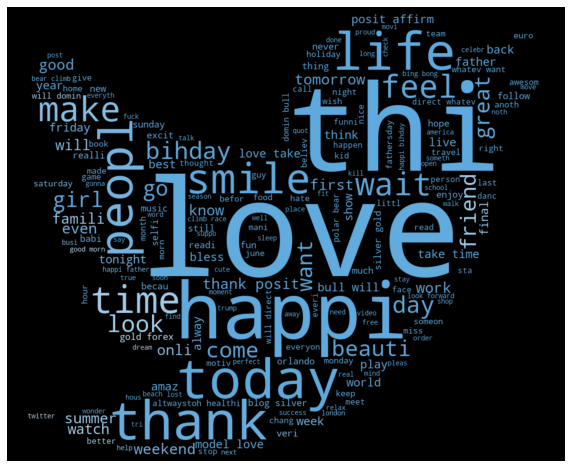

In [254]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,20))


# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [255]:
#storing the negative ones into dataset
all_words_negative = ' '.join(text for text in df_train['tweet'][df_train['label']==1])

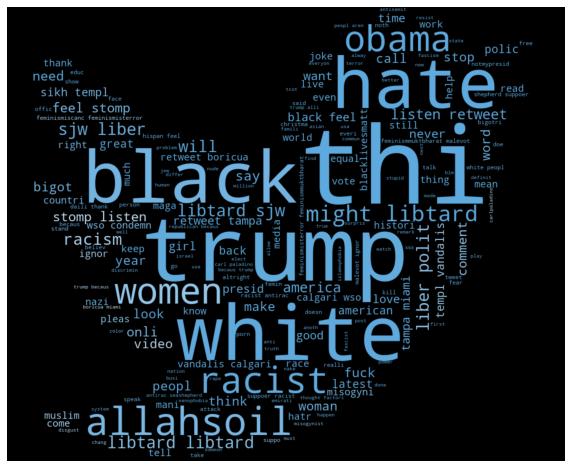

In [256]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))


# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

#using the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [257]:
#func for extracting hashtags

def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [258]:
#list of list of all the hashtags from the positive reviews from the dataset
ht_positive = Hashtags_Extract( df_train['tweet'] [df_train['label']==0])
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [259]:
ht_positive_unnest = sum(ht_positive,[])

In [260]:
#list of list of all the hashtags from the negative reviews from the dataset
ht_negative = Hashtags_Extract(df_train['tweet'] [df_train['label']==1])
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [261]:
ht_negative_unnest = sum(ht_negative,[])
ht_negative_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

In [262]:
#Counting the frequency of the words having Positive Sentiment

word_freq_positive = nltk.FreqDist(ht_positive_unnest)

# word_freq_positive

In [263]:
#Creating a dataframe for the most frequently used words in hashtags for positive words
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [264]:
df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


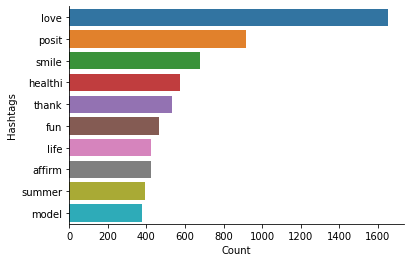

In [265]:
#Plotting the barplot for the 10 most frequent positive words used for hashtags
df_positive_plot = df_positive.nlargest(10,columns='Count') 
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [266]:
#Counting the frequency of the words having negative Sentiment
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

# word_freq_negative

In [267]:
#Creating a dataframe for the most frequently used words in hashtags for negative words
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [268]:
df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


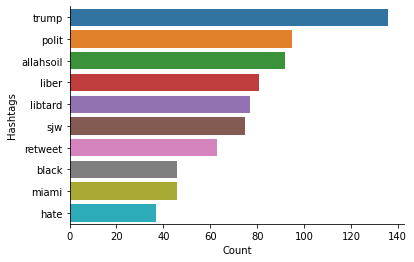

In [269]:
#Plotting the barplot for the 10 most frequent negative words used for hashtags
df_negative_plot = df_negative.nlargest(10,columns='Count') 
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [270]:
x = df_train['tweet']
y = df_train['label']

In [271]:
#Splitting the data into training and validation set
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x ,y,test_size=0.3,random_state=17)

In [272]:
#TF-IDF Features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_x_train =tfidf.fit_transform(x_train)

tfidf_x_test =tfidf.transform(x_test)


In [273]:
#using Logistic Regression
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')
accuracy = 0
kfold = KFold(10, True, 1)
for train, test in kfold.split(x, y):
  Log_Reg.fit(tfidf_x_train , y_train)
  accuracy += Log_Reg.score(tfidf_x_test, y_test)
print("Average accuracy (using Logistic Regression) : ", accuracy/10)

Average accuracy (using Logistic Regression) :  0.9501512149337785


In [274]:
#using multimonial Naive Bayes
from sklearn.naive_bayes import MultinomialNB 
accuracy = 0
kfold = KFold(10, True, 1)
for train, test in kfold.split(x, y):
  classifier = MultinomialNB().fit(tfidf_x_train , y_train)
  prediction = classifier.predict(tfidf_x_test)
  accuracy += accuracy_score(y_test, prediction)
print("Average accuracy (using multimonial Naive Bayes) : ", accuracy/10)

Average accuracy (using multimonial Naive Bayes) :  0.9486912086766086
